In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
# read data file
df=pd.read_csv('multiTimeline.csv')

In [5]:
# get our data
df

,mounth,diet:,Gym:,finance:
0,2004-01,100,27,47
1,2004-02,72,22,47
2,2004-03,66,21,44
3,2004-04,67,19,44
4,2004-05,70,20,43
...,...,...,...,...
223,2022-08,30,50,57
224,2022-09,31,49,55
225,2022-10,28,47,53
226,2022-11,28,49,53


In [6]:
# explore our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   mounth     228 non-null    object
 1   diet:      228 non-null    int64 
 2   Gym:       228 non-null    int64 
 3   finance:   228 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.2+ KB


In [7]:
# get descrbtion for  our data
df.describe()

,diet:,Gym:,finance:
count,228.000000,228.000000,228.000000
mean,46.434211,37.267544,48.013158
std,8.944768,9.361718,6.131798
min,26.000000,19.000000,36.000000
25%,41.000000,29.000000,44.000000
50%,47.000000,38.000000,46.000000
75%,51.000000,45.000000,52.000000
max,100.000000,60.000000,73.000000


In [8]:

df.columns=['Mounth','Diet','Gym','Finance']

# Wrangle Data

In [9]:
df.head(4)

,Mounth,Diet,Gym,Finance
0,2004-01,100,27,47
1,2004-02,72,22,47
2,2004-03,66,21,44
3,2004-04,67,19,44


In [11]:
df['Mounth']=pd.to_datetime(df['Mounth'])
df.head(4)

,Mounth,Diet,Gym,Finance
0,2004-01-01,100,27,47
1,2004-02-01,72,22,47
2,2004-03-01,66,21,44
3,2004-04-01,67,19,44


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Mounth   228 non-null    datetime64[ns]
 1   Diet     228 non-null    int64         
 2   Gym      228 non-null    int64         
 3   Finance  228 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 7.2 KB


In [13]:
df.set_index('Mounth',inplace=True)
df.head()

,Diet,Gym,Finance
Mounth,,,
2004-01-01,100,27,47
2004-02-01,72,22,47
2004-03-01,66,21,44
2004-04-01,67,19,44
2004-05-01,70,20,43


Explority Data Analysis

<AxesSubplot: xlabel='Mounth'>

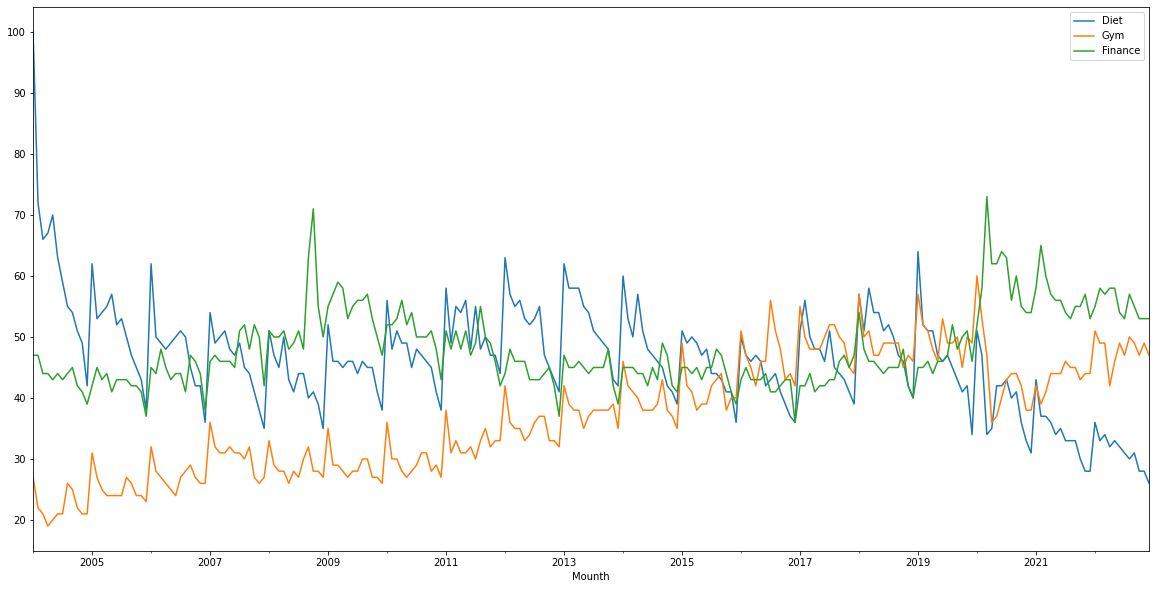

In [14]:
df.plot(figsize=(20,10))

<AxesSubplot: xlabel='Mounth'>

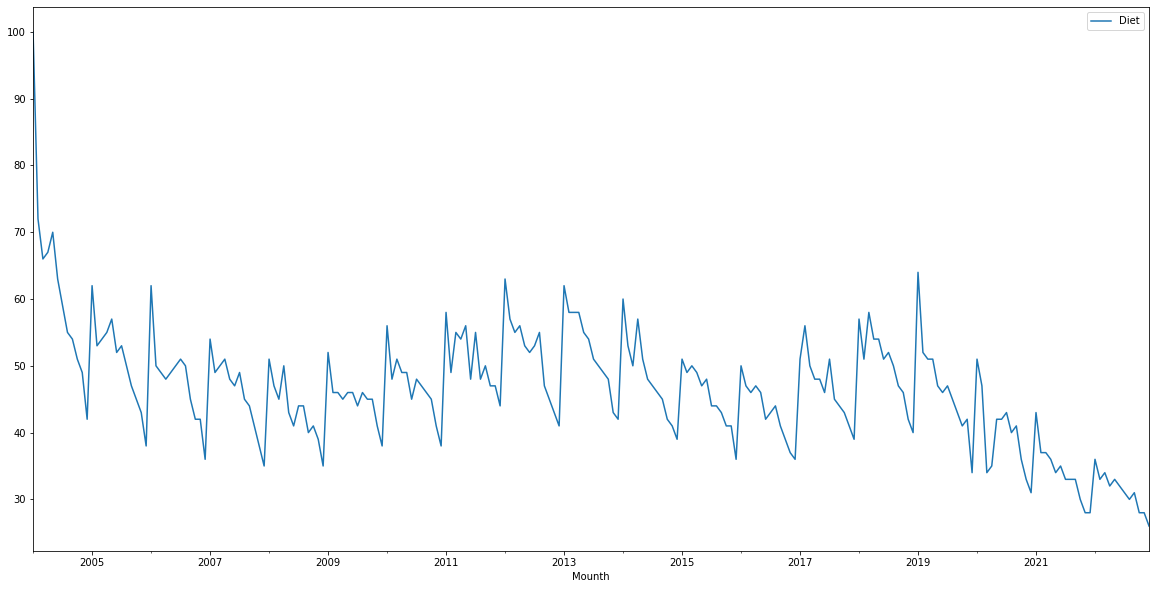

In [15]:
df[['Diet']].plot(figsize=(20,10))

Smothing data(Rolling)

In [16]:
df[['Diet']].rolling(12).mean()

,Diet
Mounth,
2004-01-01,NaN
2004-02-01,NaN
2004-03-01,NaN
2004-04-01,NaN
2004-05-01,NaN
...,...
2022-08-01,31.666667
2022-09-01,31.500000
2022-10-01,31.333333


<AxesSubplot: xlabel='Mounth'>

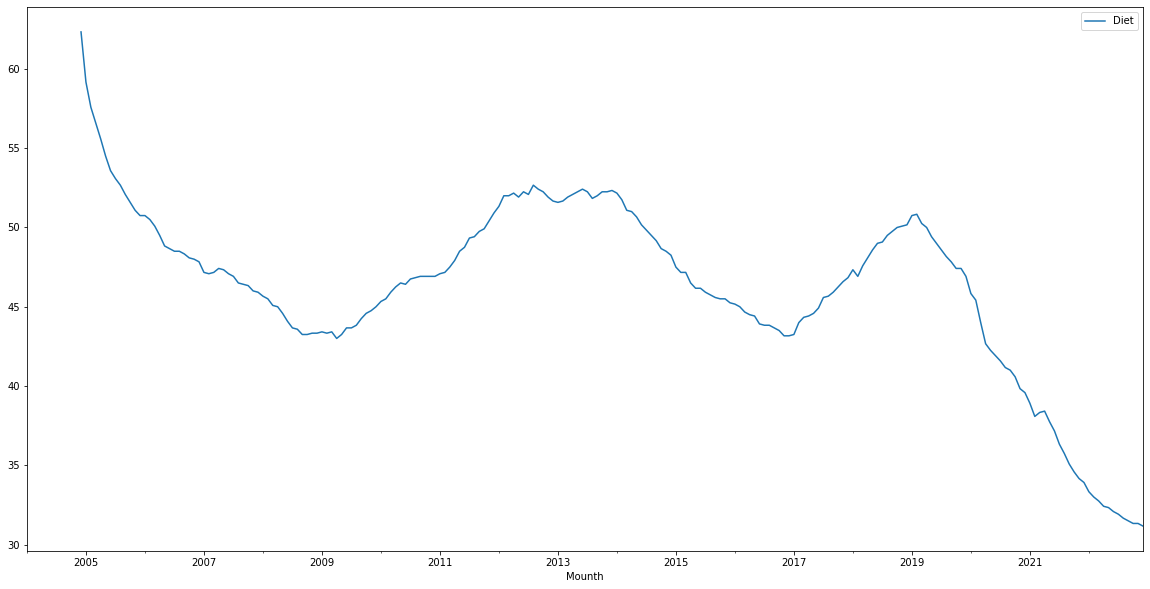

In [18]:
df[['Diet']].rolling(12).mean().plot(figsize=(20,10))

In [19]:
df[['Gym']].rolling(12).mean()

,Gym
Mounth,
2004-01-01,NaN
2004-02-01,NaN
2004-03-01,NaN
2004-04-01,NaN
2004-05-01,NaN
...,...
2022-08-01,46.583333
2022-09-01,46.916667
2022-10-01,47.250000


<AxesSubplot: xlabel='Mounth'>

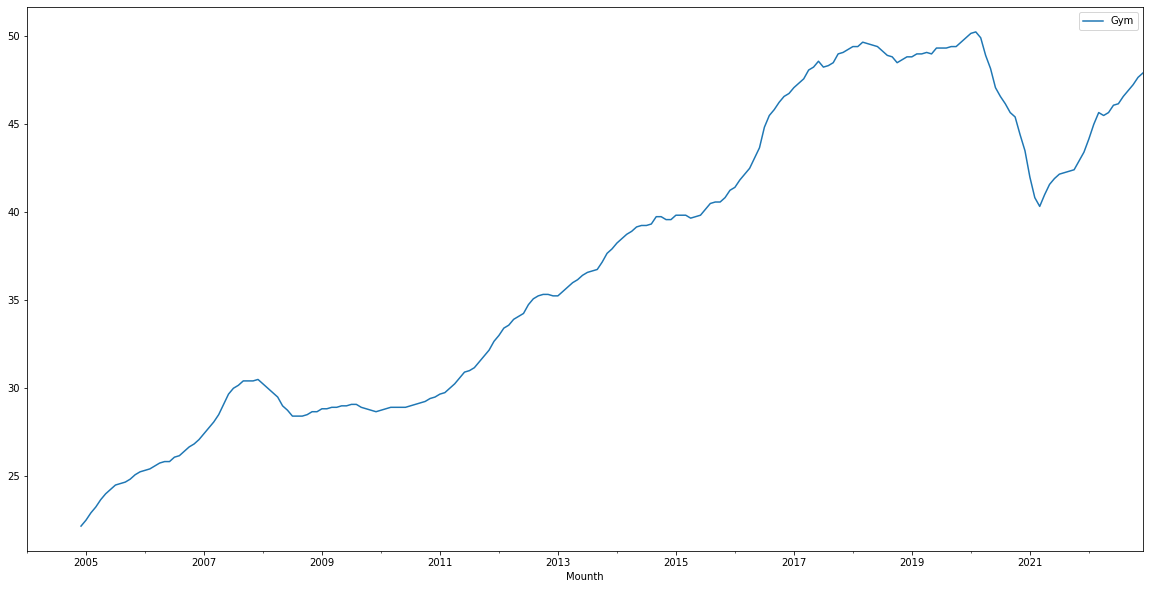

In [20]:
df[['Gym']].rolling(12).mean().plot(figsize=(20,10))

In [22]:
pd.concat([df[['Gym']].rolling(12).mean(),df[['Diet']].rolling(12).mean()],axis=1)

,Gym,Diet
Mounth,,
2004-01-01,NaN,NaN
2004-02-01,NaN,NaN
2004-03-01,NaN,NaN
2004-04-01,NaN,NaN
2004-05-01,NaN,NaN
...,...,...
2022-08-01,46.583333,31.666667
2022-09-01,46.916667,31.500000
2022-10-01,47.250000,31.333333


<AxesSubplot: xlabel='Mounth'>

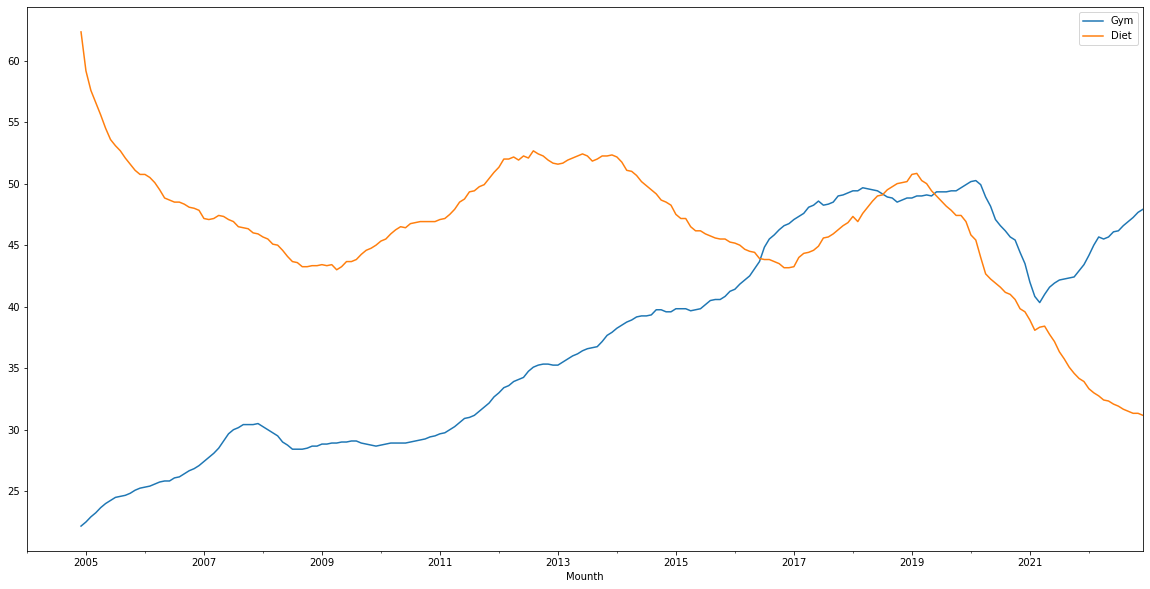

In [23]:
pd.concat([df[['Gym']].rolling(12).mean(),df[['Diet']].rolling(12).mean()],axis=1).plot(figsize=(20,10))
